<a href="https://colab.research.google.com/github/choiminji-020102/NLP_project/blob/main/%EC%8B%A4%EC%8A%B503_230918.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## IMDB 영화 리뷰 감성 분석

In [ ]:
'''
실습 개요
1. 데이터 : 50,000개의 영화 리뷰와 감성(sentiment, 긍정/부정)으로 구성된 IMDB
2. 데이터의 구성 : 학습용 데이터 25,000개 + 평가용 데이터 25,000개
3. 목표 : 학습용 데이터 25,000개 review의 문장(단어 sequence)을 학습시켜서,
평가용 데이터 25,000개 review의 sentiment를 예측하는 RNN 모델 생성, 학습, 평가 진행
'''

# 필요한 라이브러리 임폴트
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
import random

In [ ]:
### IMDB 데이터 가져오기
vocab_size=10000
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.imdb.load_data(num_words=vocab_size)

17464789/17464789 [==============================] - 0s 0us/step


In [ ]:
### 학습용 리뷰 데이터 확인 --> 결과 : 텍스트(X), 정수 인덱스의 배열
print(x_train)
print('-'*80)
print(type(x_train))

[list([1, 14, 22, 16, 43, 530, 973, 1622, 1385, 65, 458, 4468, 66, 3941, 4, 173, 36, 256, 5, 25, 100, 43, 838, 112, 50, 670, 2, 9, 35, 480, 284, 5, 150, 4, 172, 112, 167, 2, 336, 385, 39, 4, 172, 4536, 1111, 17, 546, 38, 13, 447, 4, 192, 50, 16, 6, 147, 2025, 19, 14, 22, 4, 1920, 4613, 469, 4, 22, 71, 87, 12, 16, 43, 530, 38, 76, 15, 13, 1247, 4, 22, 17, 515, 17, 12, 16, 626, 18, 2, 5, 62, 386, 12, 8, 316, 8, 106, 5, 4, 2223, 5244, 16, 480, 66, 3785, 33, 4, 130, 12, 16, 38, 619, 5, 25, 124, 51, 36, 135, 48, 25, 1415, 33, 6, 22, 12, 215, 28, 77, 52, 5, 14, 407, 16, 82, 2, 8, 4, 107, 117, 5952, 15, 256, 4, 2, 7, 3766, 5, 723, 36, 71, 43, 530, 476, 26, 400, 317, 46, 7, 4, 2, 1029, 13, 104, 88, 4, 381, 15, 297, 98, 32, 2071, 56, 26, 141, 6, 194, 7486, 18, 4, 226, 22, 21, 134, 476, 26, 480, 5, 144, 30, 5535, 18, 51, 36, 28, 224, 92, 25, 104, 4, 226, 65, 16, 38, 1334, 88, 12, 16, 283, 5, 16, 4472, 113, 103, 32, 15, 16, 5345, 19, 178, 32])
 list([1, 194, 1153, 194, 8255, 78, 228, 5, 6, 1463, 

In [ ]:
### 학습용 레이블 데이터 확인
print(y_train)
print('-'*80)
print(type(y_train))

[1 0 0 ... 0 1 0]
--------------------------------------------------------------------------------
<class 'numpy.ndarray'>


In [ ]:
### 데이터 분석(1)

# 데이터의 모양(shape)
print(f'학습용 리뷰 데이터의 모양 : {x_train.shape}')
print('-'*80)
print(f'학습용 레이블 데이터의 모양 : {y_train.shape}')
print('-'*80)
print(f'평가용 리뷰 데이터의 모양 : {x_test.shape}')
print('-'*80)
print(f'평가용 레이블 데이터의 모양 : {y_test.shape}')

학습용 리뷰 데이터의 모양 : (25000,)
--------------------------------------------------------------------------------
학습용 레이블 데이터의 모양 : (25000,)
--------------------------------------------------------------------------------
평가용 리뷰 데이터의 모양 : (25000,)
--------------------------------------------------------------------------------
평가용 레이블 데이터의 모양 : (25000,)


In [ ]:
### 학습용 / 평가용 데이터 1개씩 확인
print(f'첫번째 학습용 리뷰 데이터 : \n{x_train[0]}')
print(f'첫번째 학습용 리뷰 데이터의 자료형 : \n{type(x_train[0])}')
print('-'*80)
print(f'첫번째 평가용 리뷰 데이터 : \n{x_test[0]}')
print(f'첫번째 평가용 리뷰 데이터의 자료형 : \n{type(x_test[0])}')

첫번째 학습용 리뷰 데이터 : 
[1, 14, 22, 16, 43, 530, 973, 1622, 1385, 65, 458, 4468, 66, 3941, 4, 173, 36, 256, 5, 25, 100, 43, 838, 112, 50, 670, 2, 9, 35, 480, 284, 5, 150, 4, 172, 112, 167, 2, 336, 385, 39, 4, 172, 4536, 1111, 17, 546, 38, 13, 447, 4, 192, 50, 16, 6, 147, 2025, 19, 14, 22, 4, 1920, 4613, 469, 4, 22, 71, 87, 12, 16, 43, 530, 38, 76, 15, 13, 1247, 4, 22, 17, 515, 17, 12, 16, 626, 18, 2, 5, 62, 386, 12, 8, 316, 8, 106, 5, 4, 2223, 5244, 16, 480, 66, 3785, 33, 4, 130, 12, 16, 38, 619, 5, 25, 124, 51, 36, 135, 48, 25, 1415, 33, 6, 22, 12, 215, 28, 77, 52, 5, 14, 407, 16, 82, 2, 8, 4, 107, 117, 5952, 15, 256, 4, 2, 7, 3766, 5, 723, 36, 71, 43, 530, 476, 26, 400, 317, 46, 7, 4, 2, 1029, 13, 104, 88, 4, 381, 15, 297, 98, 32, 2071, 56, 26, 141, 6, 194, 7486, 18, 4, 226, 22, 21, 134, 476, 26, 480, 5, 144, 30, 5535, 18, 51, 36, 28, 224, 92, 25, 104, 4, 226, 65, 16, 38, 1334, 88, 12, 16, 283, 5, 16, 4472, 113, 103, 32, 15, 16, 5345, 19, 178, 32]
첫번째 학습용 리뷰 데이터의 자료형 : 
<class 'list'>
----

In [ ]:
### 정답 레이블의 분포 확인하기
print(f'학습용 정답 레이블의 항목별 개수 확인 : \n{np.unique(ar=y_train, return_counts=True)}')
print('-'*80)
print(f'평가용 정답 레이블의 항목별 개수 확인 : \n{np.unique(ar=y_test, return_counts=True)}')

학습용 정답 레이블의 항목별 개수 확인 : 
(array([0, 1]), array([12500, 12500]))
--------------------------------------------------------------------------------
평가용 정답 레이블의 항목별 개수 확인 : 
(array([0, 1]), array([12500, 12500]))


학습용 리뷰 데이터의 길이 : 
[218, 189, 141, 550, 147, 43, 123, 562, 233, 130, 450, 99, 117, 238, 109, 129, 163, 752, 212, 177, 129, 140, 256, 888, 93, 142, 220, 193, 171, 221, 174, 647, 233, 162, 597, 234, 51, 336, 139, 231, 704, 142, 861, 132, 122, 570, 55, 214, 103, 186, 113, 169, 469, 138, 302, 766, 351, 146, 59, 206, 107, 152, 186, 431, 147, 684, 383, 324, 252, 263, 787, 211, 314, 118, 390, 132, 710, 306, 167, 115, 95, 158, 156, 82, 502, 314, 190, 174, 60, 145, 214, 659, 408, 515, 461, 202, 238, 170, 107, 171, 158, 145, 790, 258, 287, 67, 123, 975, 775, 236, 195, 274, 214, 91, 1038, 815, 183, 206, 50, 118, 147, 141, 60, 56, 439, 439, 213, 144, 533, 303, 203, 563, 129, 153, 55, 92, 174, 187, 183, 165, 78, 198, 156, 223, 127, 61, 362, 84, 57, 176, 159, 57, 159, 165, 213, 194, 149, 130, 203, 19, 98, 466, 525, 130, 322, 153, 408, 215, 472, 143, 136, 354, 260, 319, 125, 209, 282, 810, 142, 240, 148, 198, 193, 123, 128, 103, 479, 345, 263, 165, 205, 333, 184, 92, 177, 335, 120, 121, 259, 180, 160,

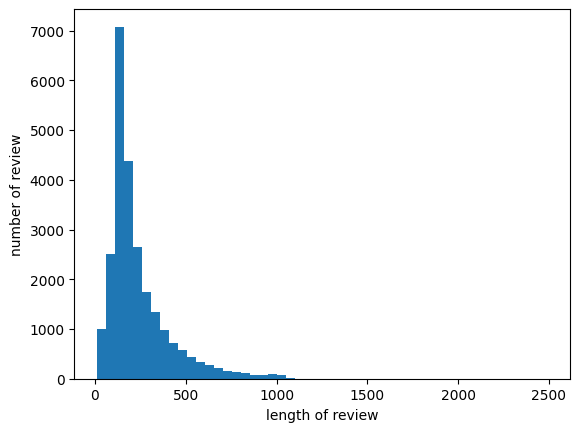

In [ ]:
### 데이터 분석하기(2)

# 학습용 데이터의 리뷰 데이터의 길이 추출
lens = []
for sentence in x_train:
    lens.append(len(sentence))

print(f'학습용 리뷰 데이터의 길이 : \n{lens}')

print('-'*80)

# 시각화 : 학습용 리뷰 데이터의 길이(리스트 자료형) --> matplotlib.pyplot.hist() 이용
plt.hist(x=lens, bins=50)
plt.xlabel('length of review')
plt.ylabel('number of review')
plt.show()

In [ ]:
### 리뷰의 길이 --> 기본 통계량 추출
# 넘파이 배열
min = np.min(lens)
max = np.max(lens)
mean = np.mean(lens)
median = np.median(lens)

q1 = np.percentile(lens, q=25)
q3 = np.percentile(lens, q=75)
q90 = np.percentile(lens, q=90)

# 결과 확인하기
print(f'학습용 리뷰의 최소 길이 : {min}')
print(f'학습용 리뷰의 최대 길이 : {max}')
print(f'학습용 리뷰의 평균 길이 : {mean}')
print(f'학습용 리뷰의 50% 길이 : {median}')
print(f'학습용 리뷰의 25% 길이 : {q1}')
print(f'학습용 리뷰의 75% 길이 : {q3}')
print(f'학습용 리뷰의 90% 길이 : {q90}')

학습용 리뷰의 최소 길이 : 11
학습용 리뷰의 최대 길이 : 2494
학습용 리뷰의 평균 길이 : 238.71364
학습용 리뷰의 50% 길이 : 178.0
학습용 리뷰의 25% 길이 : 130.0
학습용 리뷰의 75% 길이 : 291.0
학습용 리뷰의 90% 길이 : 467.0


In [ ]:
### 단어 사전 확인

# get_word_index()
word_index = tf.keras.datasets.imdb.get_word_index()
print(f'추출한 단어 사전의 자료형 : {type(word_index)}')
print('-'*80)
print(f'추출한 단어 사전 확인 : \n{word_index}')  # 요즘은 입력순대로(오름차순) 나옴.

print('-'*80)

# vocab --> {index : word}
# index를 통해 word를 찾을 수 있도록 get_index_word로 바꾸기
index_word = {}
for word, index in word_index.items():
  index_word[index] = word

# 결과 확인하기
print(f'새로 생성한 단어 사전(index_word) 확인 : \n{index_word}')

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



In [ ]:
# 생성된 새로운 단어 사전 확인하기
print(f'새로 생성한 단어 사전(index_word) 확인 : \n{index_word}')

index = index_word.keys()
print(f'index확인 : {index}')

새로 생성한 단어 사전(index_word) 확인 : 
{34701: 'fawn', 52006: 'tsukino', 52007: 'nunnery', 16816: 'sonja', 63951: 'vani', 1408: 'woods', 16115: 'spiders', 2345: 'hanging', 2289: 'woody', 52008: 'trawling', 52009: "hold's", 11307: 'comically', 40830: 'localized', 30568: 'disobeying', 52010: "'royale", 40831: "harpo's", 52011: 'canet', 19313: 'aileen', 52012: 'acurately', 52013: "diplomat's", 25242: 'rickman', 6746: 'arranged', 52014: 'rumbustious', 52015: 'familiarness', 52016: "spider'", 68804: 'hahahah', 52017: "wood'", 40833: 'transvestism', 34702: "hangin'", 2338: 'bringing', 40834: 'seamier', 34703: 'wooded', 52018: 'bravora', 16817: 'grueling', 1636: 'wooden', 16818: 'wednesday', 52019: "'prix", 34704: 'altagracia', 52020: 'circuitry', 11585: 'crotch', 57766: 'busybody', 52021: "tart'n'tangy", 14129: 'burgade', 52023: 'thrace', 11038: "tom's", 52025: 'snuggles', 29114: 'francesco', 52027: 'complainers', 52125: 'templarios', 40835: '272', 52028: '273', 52130: 'zaniacs', 34706: '275', 27631

In [ ]:
### key(->index) --> 오름차순 정렬
sorted_index = sorted(list(index))
print(sorted_index)

print('-'*80)

# 인덱스로 단어 검색 가능 --> index = 1~10 단어 추출
for idx in np.arange(1,11):
  word = index_word[idx]
  print(f'key : {idx}, word : {word}')

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186, 187, 188, 189, 190, 191, 192, 193, 194, 195, 196, 197, 198, 199, 200, 201, 202, 203, 204, 205, 206, 207, 208, 209, 210, 211, 212, 213, 214, 215, 216, 217, 218, 219, 220, 221, 22

In [ ]:
# 학습용 리뷰 데이터 --> 첫번째 데이터 --> 단어로 변환
word_list = []
for index in x_train[0]:
  word = index_word[index]
  word_list.append(word)

# 결과 확인하기
print(f'학습용 첫번째 리뷰 데이터를 단어로 변환한 결과 확인 : \n{word_list}')

학습용 첫번째 리뷰 데이터를 단어로 변환한 결과 확인 : 
['the', 'as', 'you', 'with', 'out', 'themselves', 'powerful', 'lets', 'loves', 'their', 'becomes', 'reaching', 'had', 'journalist', 'of', 'lot', 'from', 'anyone', 'to', 'have', 'after', 'out', 'atmosphere', 'never', 'more', 'room', 'and', 'it', 'so', 'heart', 'shows', 'to', 'years', 'of', 'every', 'never', 'going', 'and', 'help', 'moments', 'or', 'of', 'every', 'chest', 'visual', 'movie', 'except', 'her', 'was', 'several', 'of', 'enough', 'more', 'with', 'is', 'now', 'current', 'film', 'as', 'you', 'of', 'mine', 'potentially', 'unfortunately', 'of', 'you', 'than', 'him', 'that', 'with', 'out', 'themselves', 'her', 'get', 'for', 'was', 'camp', 'of', 'you', 'movie', 'sometimes', 'movie', 'that', 'with', 'scary', 'but', 'and', 'to', 'story', 'wonderful', 'that', 'in', 'seeing', 'in', 'character', 'to', 'of', '70s', 'musicians', 'with', 'heart', 'had', 'shadows', 'they', 'of', 'here', 'that', 'with', 'her', 'serious', 'to', 'have', 'does', 'when', 'from', '

In [ ]:
### 학습용, 평가용 리뷰 데이터의 길이를 일정하게 맞춰주기

'''
### tf.keras.utils.pad_sequences(sequences, maxlen)
'''

# 최대 길이 설정
maxlen = 470

# 자르고 붙이기
x_train_seq = tf.keras.utils.pad_sequences(sequences=x_train, maxlen=maxlen)
x_test_seq = tf.keras.utils.pad_sequences(sequences=x_test, maxlen=maxlen)

# 결과 확인하기
print(f'자르고 붙이기 전 학습용 리뷰 데이터의 길이 = {len(x_train[0])}')
print(f'자르고 붙인 후 학습용 리뷰 데이터의 길이 = {len(x_train_seq[0])}')

자르고 붙이기 전 학습용 리뷰 데이터의 길이 = 218
자르고 붙인 후 학습용 리뷰 데이터의 길이 = 470


### RNN 모델을 이용한 텍스트 감성 분석

In [ ]:
### 랜덤 시드 설정
random.seed(0)
np.random.seed(0)
tf.random.set_seed(0)

initializer = tf.keras.initializers.GlorotUniform(seed=0)

In [ ]:
### 학습 모델 구성하기

'''
모델 구성 순서
1. Sequential()를 이용하여 모델 껍질(컨데이너) 생성하기
2. Embedding layer 추가하기
3. SimpleRNN layer 추가하기
4. Dense layer 추가하가
'''

model = tf.keras.Sequential()
model.add(tf.keras.layers.Embedding(input_dim=vocab_size, output_dim=32, input_length=maxlen, embeddings_initializer=initializer))
model.add(tf.keras.layers.SimpleRNN(units=16, kernel_initializer=initializer))
model.add(tf.keras.layers.Dense(units=1, activation='sigmoid', kernel_initializer=initializer))

# 모델 구조 확인하기
model.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_2 (Embedding)     (None, 470, 32)           320000    
                                                                 
 simple_rnn_2 (SimpleRNN)    (None, 16)                784       
                                                                 
 dense_1 (Dense)             (None, 1)                 17        
                                                                 
Total params: 320801 (1.22 MB)
Trainable params: 320801 (1.22 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
### 모델 컴파일(compile)하기

'''
# 컴파일(compile)
1. 학습 방식에 대한 환경을 설정하여 모델을 완성하기
2. 손실 함수 설정 --> loss --> 감성 분석은 이진 분류, binary_crossentropy 사용
3. 최적화 함수 설정 --> optimizer --> adam 사용
4. 평가 기준 설정 -- > metrics --> ['accuracy'] 사용
'''

model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [ ]:
### 모델 학습하기 --> model.fit()

# tf.keras.callbacks 설정 --> ModelCheckpoint() 함수 실행
file_path = 'rnn.h5'
checkpoint = tf.keras.callbacks.ModelCheckpoint(
    filepath = file_path,
    monitor = 'val_loss',
    save_best_only = True
)

# 학습 진행
model.fit(
    x = x_train_seq,
    y = y_train,
    batch_size = 256,
    epochs = 10,
    validation_split = 0.25,
    callbacks = [checkpoint]
)

Epoch 1/10
74/74 [==============================] - 9s 106ms/step - loss: 0.5741 - accuracy: 0.7265 - val_loss: 0.5068 - val_accuracy: 0.7555
Epoch 2/10
 2/74 [..............................] - ETA: 5s - loss: 0.4399 - accuracy: 0.8145

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


74/74 [==============================] - 7s 96ms/step - loss: 0.3951 - accuracy: 0.8482 - val_loss: 0.3951 - val_accuracy: 0.8398
Epoch 3/10
74/74 [==============================] - 7s 91ms/step - loss: 0.3052 - accuracy: 0.8870 - val_loss: 0.3916 - val_accuracy: 0.8336
Epoch 4/10
74/74 [==============================] - 7s 100ms/step - loss: 0.2374 - accuracy: 0.9185 - val_loss: 0.3659 - val_accuracy: 0.8523
Epoch 5/10
74/74 [==============================] - 7s 91ms/step - loss: 0.1718 - accuracy: 0.9460 - val_loss: 0.3688 - val_accuracy: 0.8530
Epoch 6/10
74/74 [==============================] - 9s 117ms/step - loss: 0.1267 - accuracy: 0.9633 - val_loss: 0.3744 - val_accuracy: 0.8536
Epoch 7/10
74/74 [==============================] - 7s 100ms/step - loss: 0.0963 - accuracy: 0.9739 - val_loss: 0.4025 - val_accuracy: 0.8566
Epoch 8/10
74/74 [==============================] - 7s 88ms/step - loss: 0.0848 - accuracy: 0.9771 - val_loss: 0.3931 - val_accuracy: 0.8571
Epoch 9/10
74/74 [===

In [ ]:
### 학습 모델 평가하기

# 파일 경로 설정
file_path = '/content/rnn.h5'

# 학습 모델 불러오기
model.load_weights(file_path)

# 평가하기 --> evaluate() 사용 --> predict + accuracy_score
result = model.evaluate(x_test_seq, y_test)

# 결과 확인하기
print(f'학습된 모델에 대한 평가 결과 : {result}')

782/782 [==============================] - 18s 23ms/step - loss: 0.3721 - accuracy: 0.8432
학습된 모델에 대한 평가 결과 : [0.3721196949481964, 0.8431599736213684]


### LSTM 모델을 이용한 텍스트 감성 분석

In [ ]:
### 랜덤 시드 설정
random.seed(0)
np.random.seed(0)
tf.random.set_seed(0)
initializer = tf.keras.initializers.GlorotUniform(seed=0)

In [ ]:
### 학습 모델 구성하기

'''
모델 구성 순서
1. Sequential()를 이용하여 모델 껍질(컨데이너) 생성하기
2. Embedding layer 추가하기
3. SimpleRNN layer 추가하기
4. Dense layer 추가하가
'''

# 모델 구조 생성하기
model = tf.keras.Sequential()
model.add(tf.keras.layers.Embedding(input_dim=vocab_size, output_dim=32, input_length=maxlen, embeddings_initializer=initializer))
model.add(tf.keras.layers.LSTM(units=16, kernel_initializer=initializer))
model.add(tf.keras.layers.Dense(units=1, activation='sigmoid', kernel_initializer=initializer))

# 모델 구조 확인하기
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 470, 32)           320000    
                                                                 
 lstm (LSTM)                 (None, 16)                3136      
                                                                 
 dense (Dense)               (None, 1)                 17        
                                                                 
Total params: 323153 (1.23 MB)
Trainable params: 323153 (1.23 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
### 모델 컴파일(compile)하기

'''
# 컴파일(compile)
1. 학습 방식에 대한 환경을 설정하여 모델을 완성하기
2. 손실 함수 설정 --> loss --> 감성 분석은 이진 분류, binary_crossentropy 사용
3. 최적화 함수 설정 --> optimizer --> adam 사용
4. 평가 기준 설정 -- > metrics --> ['accuracy'] 사용
'''

model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [ ]:
### 모델 학습하기 --> model.fit()

# tf.keras.callbacks 설정 --> ModelCheckpoint() 함수 실행
file_path = 'lstm.h5'
checkpoint = tf.keras.callbacks.ModelCheckpoint(
    filepath = file_path,
    monitor='val_loss',
    save_best_only=True
)

# 학습 진행
model.fit(
    x=x_train_seq,
    y=y_train,
    batch_size=256,
    epochs=20,
    validation_split=0.25,
    callbacks=[checkpoint]
)

Epoch 1/20
74/74 [==============================] - 23s 214ms/step - loss: 0.6357 - accuracy: 0.6834 - val_loss: 0.4725 - val_accuracy: 0.8150
Epoch 2/20


/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


74/74 [==============================] - 13s 179ms/step - loss: 0.3829 - accuracy: 0.8550 - val_loss: 0.3639 - val_accuracy: 0.8509
Epoch 3/20
74/74 [==============================] - 11s 146ms/step - loss: 0.2726 - accuracy: 0.9012 - val_loss: 0.3324 - val_accuracy: 0.8602
Epoch 4/20
74/74 [==============================] - 12s 159ms/step - loss: 0.2087 - accuracy: 0.9271 - val_loss: 0.3307 - val_accuracy: 0.8696
Epoch 5/20
74/74 [==============================] - 9s 120ms/step - loss: 0.1628 - accuracy: 0.9481 - val_loss: 0.3571 - val_accuracy: 0.8616
Epoch 6/20
74/74 [==============================] - 7s 98ms/step - loss: 0.1337 - accuracy: 0.9602 - val_loss: 0.3452 - val_accuracy: 0.8680
Epoch 7/20
74/74 [==============================] - 6s 85ms/step - loss: 0.1080 - accuracy: 0.9707 - val_loss: 0.3715 - val_accuracy: 0.8765
Epoch 8/20
74/74 [==============================] - 7s 98ms/step - loss: 0.0958 - accuracy: 0.9745 - val_loss: 0.3894 - val_accuracy: 0.8674
Epoch 9/20
74/74 

In [ ]:
### 학습 모델 평가하기

# 파일 경로 설정하기
file_path = 'lstm.h5'

# 학습 모델 불러오기
model.load_weights(file_path)

# 평가하기 --> evaluate()
result = model.evaluate(x_test_seq, y_test)

# 결과 확인하기
print(result)

782/782 [==============================] - 5s 7ms/step - loss: 0.3427 - accuracy: 0.8641
[0.3427080512046814, 0.864080011844635]


### CNN 모델을 이용한 텍스트 감성 분석

In [ ]:
### 랜덤 시드 설정
random.seed(0)
np.random.seed(0)
tf.random.set_seed(0)
initializer = tf.keras.initializers.GlorotUniform(seed=0)

In [ ]:
### 학습 모델 구성하기

'''
모델 구성 순서
1. Sequential()를 이용하여 모델 껍질(컨데이너) 생성하기
2. Embedding layer 추가하기
3. Conv1D layer 추가하기
4. pooling layer(GlobalMaxPool1D) 추가하기
4. Dense layer 추가하기
'''

# 모델 구조 생성하기
model = tf.keras.Sequential()
model.add(tf.keras.layers.Embedding(input_dim=vocab_size, output_dim=32, input_length=maxlen, embeddings_initializer=initializer))
model.add(tf.keras.layers.Conv1D(filters=256,
                                 kernel_size=3,
                                 padding='valid',
                                 strides=1,
                                 activation='relu',
                                 kernel_initializer=initializer))
model.add(tf.keras.layers.GlobalMaxPooling1D())
model.add(tf.keras.layers.Dense(units=1, activation='sigmoid', kernel_initializer=initializer))

# 모델 구조 확인하기
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_1 (Embedding)     (None, 470, 32)           320000    
                                                                 
 conv1d (Conv1D)             (None, 468, 256)          24832     
                                                                 
 global_max_pooling1d (Glob  (None, 256)               0         
 alMaxPooling1D)                                                 
                                                                 
 dense_1 (Dense)             (None, 1)                 257       
                                                                 
Total params: 345089 (1.32 MB)
Trainable params: 345089 (1.32 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
### 모델 컴파일(compile)하기

'''
# 컴파일(compile)
1. 학습 방식에 대한 환경을 설정하여 모델을 완성하기
2. 손실 함수 설정 --> loss --> 감성 분석은 이진 분류, binary_crossentropy 사용
3. 최적화 함수 설정 --> optimizer --> adam 사용
4. 평가 기준 설정 -- > metrics --> ['accuracy'] 사용
'''

model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [ ]:
### 모델 학습하기 --> model.fit()

# tf.keras.callbacks 설정 --> ModelCheckpoint() 함수 실행
file_path = 'cnn.h5'
checkpoint = tf.keras.callbacks.ModelCheckpoint(
    filepath = file_path,
    monitor='val_loss',
    save_best_only=True
)

# 학습 진행
model.fit(
    x=x_train_seq,
    y=y_train,
    batch_size=256,
    epochs=10,
    validation_split=0.25,
    callbacks=[checkpoint]
)

Epoch 1/10
74/74 [==============================] - 18s 161ms/step - loss: 0.6366 - accuracy: 0.6879 - val_loss: 0.4941 - val_accuracy: 0.7733
Epoch 2/10
74/74 [==============================] - 10s 138ms/step - loss: 0.3935 - accuracy: 0.8269 - val_loss: 0.3445 - val_accuracy: 0.8544
Epoch 3/10
74/74 [==============================] - 9s 116ms/step - loss: 0.2696 - accuracy: 0.8905 - val_loss: 0.3016 - val_accuracy: 0.8706
Epoch 4/10
74/74 [==============================] - 9s 123ms/step - loss: 0.1919 - accuracy: 0.9307 - val_loss: 0.2933 - val_accuracy: 0.8774
Epoch 5/10
74/74 [==============================] - 6s 87ms/step - loss: 0.1341 - accuracy: 0.9557 - val_loss: 0.3028 - val_accuracy: 0.8782
Epoch 6/10
74/74 [==============================] - 6s 75ms/step - loss: 0.0900 - accuracy: 0.9741 - val_loss: 0.3236 - val_accuracy: 0.8742
Epoch 7/10
74/74 [==============================] - 5s 69ms/step - loss: 0.0582 - accuracy: 0.9866 - val_loss: 0.3524 - val_accuracy: 0.8675
Epoch 8

In [ ]:
### 학습된 모델 평가하기

# evaluate() 이용
result = model.evaluate(x_test_seq, y_test)

# 결과 확인하기
print(result)

782/782 [==============================] - 3s 4ms/step - loss: 0.4809 - accuracy: 0.8494
[0.480862021446228, 0.849399983882904]
